In [1]:
import nltk
from spacy import displacy
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import textstat
import os
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import spacy
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from spacytextblob.spacytextblob import SpacyTextBlob
import gensim

In [2]:
parent_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [10]:
english_train = pd.read_csv(os.path.join(parent_path, 'Data\PreprocessedData\english_train_preprocess.csv'))
english_dev = pd.read_csv(os.path.join(parent_path, 'Data\PreprocessedData\english_dev_preprocess.csv'))
english_test = pd.read_csv(os.path.join(parent_path, 'Data\PreprocessedData\english_test_preprocess.csv'))

In [11]:
# Stack the dataframes
df_english = pd.concat([english_train, english_dev, english_test], ignore_index=True)

In [12]:
df_english.head()

,Unnamed: 0,text,label,preprocessed_text
0,0,these tiktoks radiate gay chaotic energy and i...,Non_hope_speech,these tiktoks radiate gay chaotic energy and i...
1,1,@Champions Again He got killed for using false...,Non_hope_speech,<user> again he got killed for using false money
2,2,It's not that all lives don't matter,Non_hope_speech,its not that all lives dont matter
3,3,Is it really that difficult to understand? Bla...,Non_hope_speech,is it really that difficult to understand blac...
4,4,Whenever we say black isn't that racists? Why...,Non_hope_speech,whenever we say black isnt that racists why do...


In [13]:
df_english['label'].value_counts()

Non_hope_speech    25940
Hope_speech         2484
not-English           27
Name: label, dtype: int64

In [15]:
textstat.set_lang("en")
df_english["readability_text"] = df_english["text"].apply(lambda x: textstat.flesch_reading_ease(x))
df_english["ARI_text"] = df_english["text"].apply(lambda x: textstat.automated_readability_index(x)) #tells what grade is needed to read the text

df_english["readability_preprocessed_text"] = df_english["preprocessed_text"].apply(lambda x: textstat.flesch_reading_ease(x))
df_english["ARI_preprocessed_text"] = df_english["preprocessed_text"].apply(lambda x: textstat.automated_readability_index(x)) #tells what grade is needed to read the text

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2572\1478801656.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_english[df_english["label"] == "Non_hope_speech"]["readability_preprocessed_text"], label="Non Hope Speech")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2572\1478801656.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

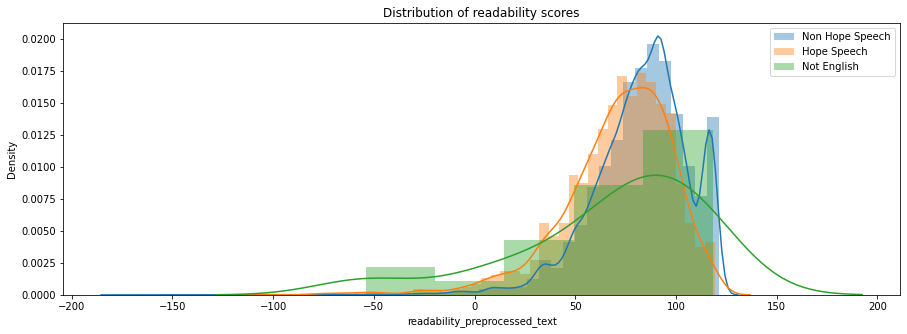

In [21]:
# Plot the distribution of readability scores with label as hue
plt.figure(figsize=(15, 5))
sns.distplot(df_english[df_english["label"] == "Non_hope_speech"]["readability_preprocessed_text"], label="Non Hope Speech")
sns.distplot(df_english[df_english["label"] == "Hope_speech"]["readability_preprocessed_text"], label="Hope Speech")
sns.distplot(df_english[df_english["label"] == "not-English"]["readability_preprocessed_text"], label="Not English")
plt.legend()
plt.title("Distribution of readability scores")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2572\2093620315.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_english[df_english["label"] == "Non_hope_speech"]["ARI_preprocessed_text"], label="Non Hope Speech")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2572\2093620315.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

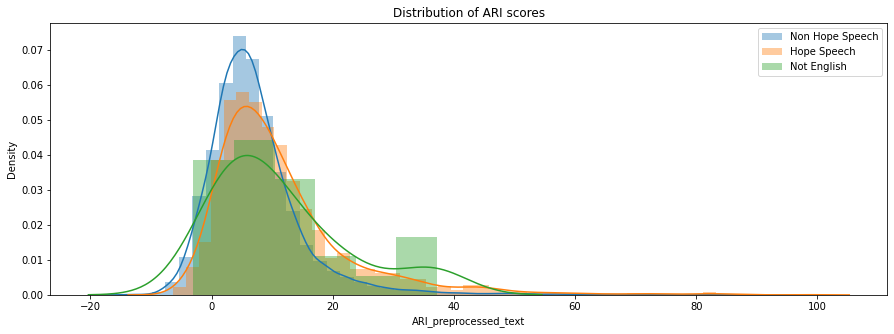

In [22]:
# Plot the distribution of readability scores with label as hue
plt.figure(figsize=(15, 5))
sns.distplot(df_english[df_english["label"] == "Non_hope_speech"]["ARI_preprocessed_text"], label="Non Hope Speech")
sns.distplot(df_english[df_english["label"] == "Hope_speech"]["ARI_preprocessed_text"], label="Hope Speech")
sns.distplot(df_english[df_english["label"] == "not-English"]["ARI_preprocessed_text"], label="Not English")
plt.legend()
plt.title("Distribution of ARI scores")
plt.show()

In [7]:
df_english.head()

,Unnamed: 0,text,label,preprocessed_text,readability,ARI
0,0,Thats it.... like....I dont like that statue,Non_hope_speech,thats it likei dont like that statue,115.13,7.6
1,1,@Generation X Counting money that she been giv...,Non_hope_speech,<user> x counting money that she been given fo...,41.36,12.2
2,2,@Paola Hernandez i never said to be intolerant...,Non_hope_speech,<user> hernandez i never said to be intolerant...,68.77,9.7
3,3,@Firstlast300 Wow An opinion is that I don't l...,Non_hope_speech,<user> wow an opinion is that i dont like a color,94.15,4.2
4,4,WOW!!!!!!!That was so so inspiring and incredi...,Hope_speech,wowthat was so so inspiring and incredible thi...,89.75,6.6


## Class Wise Distribution

<AxesSubplot:>

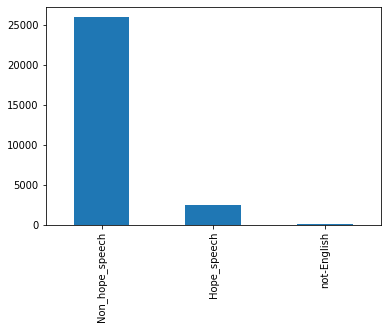

In [23]:
df_english['label'].value_counts().plot(kind='bar')

## Tokenize

In [25]:
english_stop_words = list(set(stopwords.words('english')))
english_stop_words.append('I')
english_stop_words.append('i')
def tokenize(tweet, remove_stopwords=False):
    tknzr = TweetTokenizer()
    tokens = tknzr.tokenize(tweet)
    if remove_stopwords:
        tokens = [w for w in tokens if not w in english_stop_words]
    return tokens

In [26]:
df_english['tokens_without_stopwords'] = df_english['preprocessed_text'].apply(lambda x: tokenize(x, remove_stopwords=True))
df_english['tokens_with_stopwords'] = df_english['preprocessed_text'].apply(lambda x: tokenize(x, remove_stopwords=False))

In [27]:
df_english.head()

,Unnamed: 0,text,label,preprocessed_text,readability,ARI,tokens_without_stopwords,tokens_with_stopwords,Word Count without Stopwords,Character Count,Average Word Length without Stopwords,Word Count with Stopwords,Average Word Length with Stopwords,Text without Stopwords
0,0,Thats it.... like....I dont like that statue,Non_hope_speech,thats it likei dont like that statue,115.13,7.6,"[thats, likei, dont, like, statue]","[thats, it, likei, dont, like, that, statue]",7,44,6.285714,10,4.400000,Thats ... like ... dont like statue
1,1,@Generation X Counting money that she been giv...,Non_hope_speech,<user> x counting money that she been given fo...,41.36,12.2,"[<user>, x, counting, money, given, promoting,...","[<user>, x, counting, money, that, she, been, ...",10,87,8.700000,14,6.214286,@Generation X Counting money given promoting h...
2,2,@Paola Hernandez i never said to be intolerant...,Non_hope_speech,<user> hernandez i never said to be intolerant...,68.77,9.7,"[<user>, hernandez, never, said, intolerant, h...","[<user>, hernandez, i, never, said, to, be, in...",10,70,7.000000,14,5.000000,@Paola Hernandez never said intolerant hateful...
3,3,@Firstlast300 Wow An opinion is that I don't l...,Non_hope_speech,<user> wow an opinion is that i dont like a color,94.15,4.2,"[<user>, wow, opinion, dont, like, color]","[<user>, wow, an, opinion, is, that, i, dont, ...",6,57,9.500000,11,5.181818,@Firstlast300 Wow An opinion like color
4,4,WOW!!!!!!!That was so so inspiring and incredi...,Hope_speech,wowthat was so so inspiring and incredible thi...,89.75,6.6,"[wowthat, inspiring, incredible, speech, saved...","[wowthat, was, so, so, inspiring, and, incredi...",14,86,6.142857,21,4.095238,WOW ! ! ! That inspiring incredible ! ! ! THis...


In [28]:
df_english['Word Count without Stopwords'] = df_english['tokens_without_stopwords'].apply(lambda x: len(x))
df_english['Character Count'] = df_english['text'].apply(lambda x: len(x))
df_english['Average Word Length without Stopwords'] = df_english['Character Count'] / df_english['Word Count without Stopwords']
df_english['Word Count with Stopwords'] = df_english['tokens_with_stopwords'].apply(lambda x: len(x))
df_english['Average Word Length with Stopwords'] = df_english['Character Count'] / df_english['Word Count with Stopwords']
df_english['Text without Stopwords'] = df_english['tokens_without_stopwords'].apply(lambda x: ' '.join(x))

In [29]:
df_english.head()

,Unnamed: 0,text,label,preprocessed_text,readability,ARI,tokens_without_stopwords,tokens_with_stopwords,Word Count without Stopwords,Character Count,Average Word Length without Stopwords,Word Count with Stopwords,Average Word Length with Stopwords,Text without Stopwords
0,0,Thats it.... like....I dont like that statue,Non_hope_speech,thats it likei dont like that statue,115.13,7.6,"[thats, likei, dont, like, statue]","[thats, it, likei, dont, like, that, statue]",5,44,8.800000,7,6.285714,thats likei dont like statue
1,1,@Generation X Counting money that she been giv...,Non_hope_speech,<user> x counting money that she been given fo...,41.36,12.2,"[<user>, x, counting, money, given, promoting,...","[<user>, x, counting, money, that, she, been, ...",9,87,9.666667,13,6.692308,<user> x counting money given promoting hyster...
2,2,@Paola Hernandez i never said to be intolerant...,Non_hope_speech,<user> hernandez i never said to be intolerant...,68.77,9.7,"[<user>, hernandez, never, said, intolerant, h...","[<user>, hernandez, i, never, said, to, be, in...",7,70,10.000000,11,6.363636,<user> hernandez never said intolerant hateful _
3,3,@Firstlast300 Wow An opinion is that I don't l...,Non_hope_speech,<user> wow an opinion is that i dont like a color,94.15,4.2,"[<user>, wow, opinion, dont, like, color]","[<user>, wow, an, opinion, is, that, i, dont, ...",6,57,9.500000,11,5.181818,<user> wow opinion dont like color
4,4,WOW!!!!!!!That was so so inspiring and incredi...,Hope_speech,wowthat was so so inspiring and incredible thi...,89.75,6.6,"[wowthat, inspiring, incredible, speech, saved...","[wowthat, was, so, so, inspiring, and, incredi...",6,86,14.333333,14,6.142857,wowthat inspiring incredible speech saved day


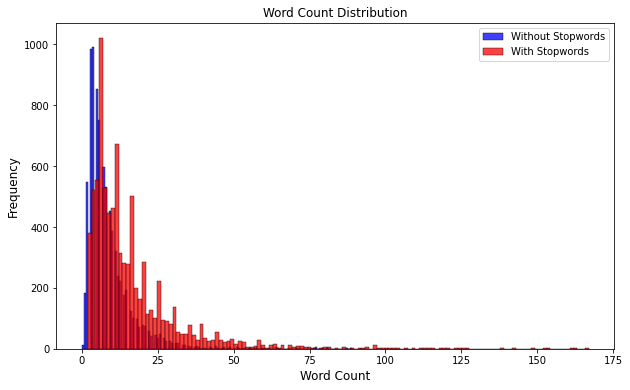

In [30]:
# Histogram of Word Count without Stopwords and with Stopwords on same plot
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot histogram
sns.histplot(df_english['Word Count without Stopwords'], color='blue', label='Without Stopwords', ax=ax)
sns.histplot(df_english['Word Count with Stopwords'], color='red', label='With Stopwords', ax=ax)
# set title and labels
ax.set_title('Word Count Distribution', fontsize=12)
ax.set_xlabel('Word Count', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

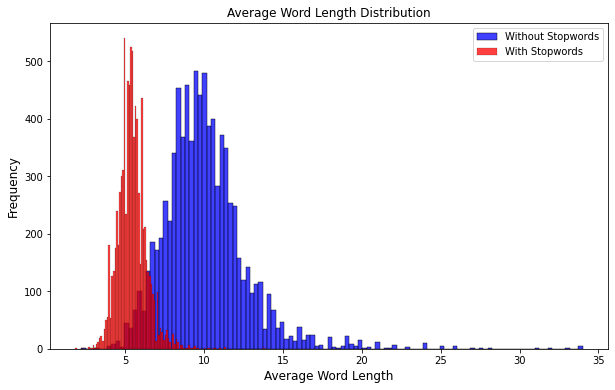

In [31]:
# Histogram of Average Word Length without Stopwords and with Stopwords on same plot
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot histogram
sns.histplot(df_english['Average Word Length without Stopwords'], color='blue', label='Without Stopwords', ax=ax)
sns.histplot(df_english['Average Word Length with Stopwords'], color='red', label='With Stopwords', ax=ax)
# set title and labels
ax.set_title('Average Word Length Distribution', fontsize=12)
ax.set_xlabel('Average Word Length', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

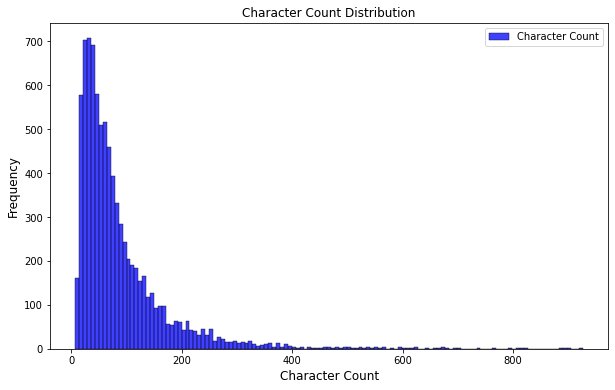

In [32]:
# Histogram of character count
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot histogram
sns.histplot(df_english['Character Count'], color='blue', label='Character Count', ax=ax)
# set title and labels
ax.set_title('Character Count Distribution', fontsize=12)
ax.set_xlabel('Character Count', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

In [33]:
corpus_without_stopwords = ' '.join(df_english['Text without Stopwords'])
corpus_without_stopwords = corpus_without_stopwords.split()

corpus_with_stopwords = ' '.join(df_english['text'])
corpus_with_stopwords = corpus_with_stopwords.split()

# create a dictionary of words and their frequency

def create_dictionary(corpus):
    word_freq = {}
    for word in corpus:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1
    return word_freq

word_freq_without_stopwords = create_dictionary(corpus_without_stopwords)
word_freq_with_stopwords = create_dictionary(corpus_with_stopwords)
# get stop word frequency
stop_word_freq = {}
for word in english_stop_words:
    if word in word_freq_with_stopwords.keys():
        stop_word_freq[word] = word_freq_with_stopwords[word]

In [34]:
# sort the dictionary by values
sorted_stop_word_freq = sorted(stop_word_freq.items(), key=lambda x: x[1], reverse=True)
word_freq_with_stopwords = sorted(word_freq_with_stopwords.items(), key=lambda x: x[1], reverse=True)
word_freq_without_stopwords = sorted(word_freq_without_stopwords.items(), key=lambda x: x[1], reverse=True)

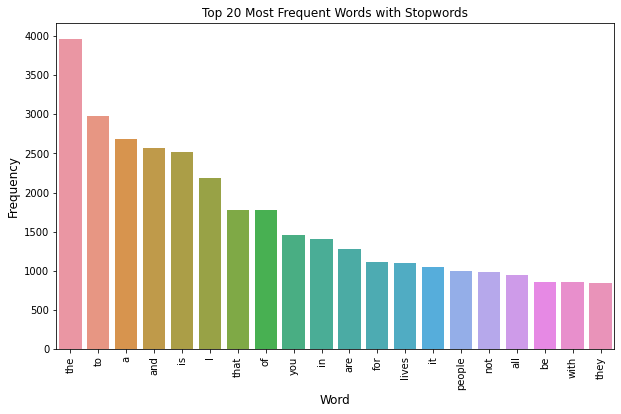

In [35]:
# plot the top 20 most frequent words
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot bar chart
sns.barplot(x=[x[0] for x in word_freq_with_stopwords[:20]], y=[x[1] for x in word_freq_with_stopwords[:20]], ax=ax)
# set title and labels
ax.set_title('Top 20 Most Frequent Words with Stopwords', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.show()

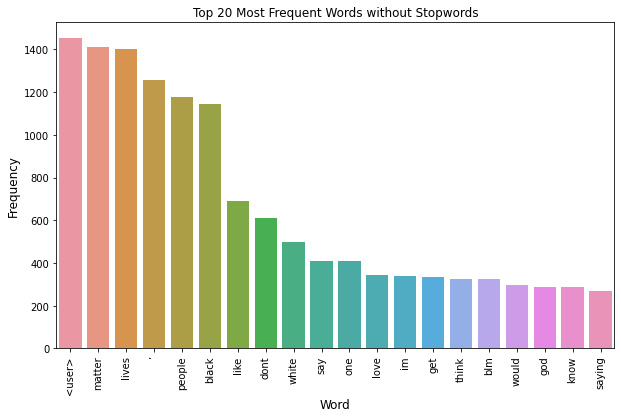

In [36]:
# plot the top 20 most frequent words without stopwords
# new plot
fig, ax = plt.subplots(figsize=(10, 6))
# plot bar chart
sns.barplot(x=[x[0] for x in word_freq_without_stopwords[:20]], y=[x[1] for x in word_freq_without_stopwords[:20]], ax=ax)
# set title and labels
ax.set_title('Top 20 Most Frequent Words without Stopwords', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.show()

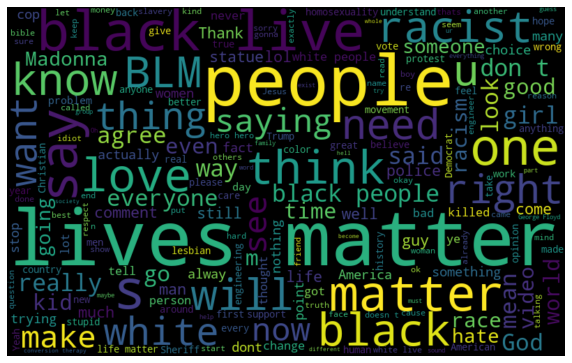

In [37]:
# word cloud
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(corpus_with_stopwords))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

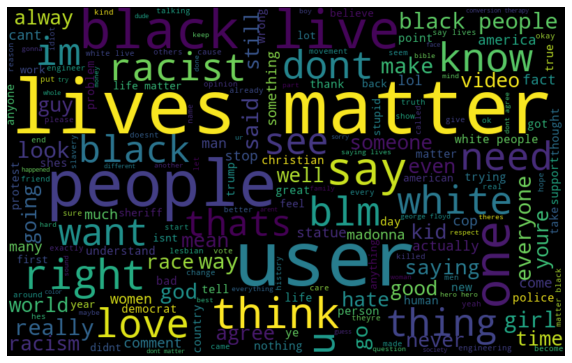

In [38]:
# word cloud
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(corpus_without_stopwords))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
df_english['label'].value_counts()

Non_hope_speech    7731
Hope_speech         794
not-English           7
Name: label, dtype: int64

<AxesSubplot:title={'center':'Count (label)'}>

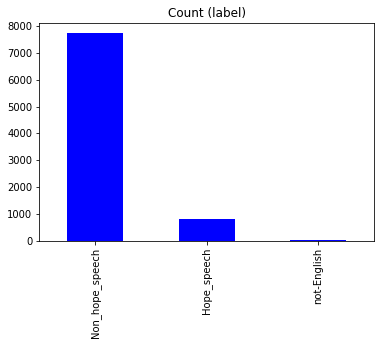

In [40]:
df_english['label'].value_counts().plot(kind='bar', title='Count (label)', color='blue')

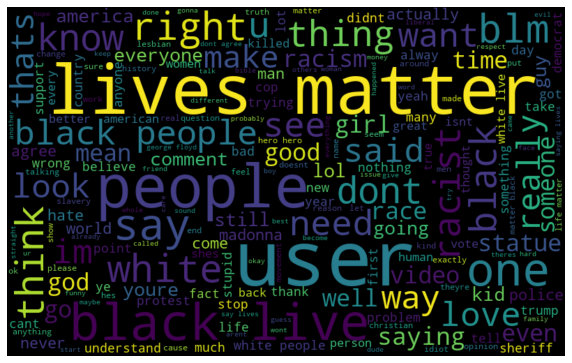

In [47]:
# Word Cloud for Class Non_hope_speech
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(df_english[df_english['label'] == 'Non_hope_speech']['Text without Stopwords']))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

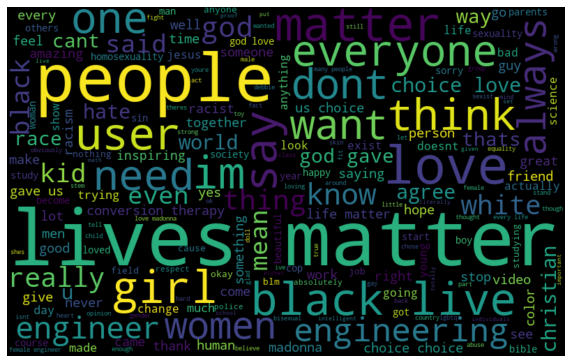

In [48]:
# Word Cloud for Class Hope_speech
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(df_english[df_english['label'] == 'Hope_speech']['Text without Stopwords']))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

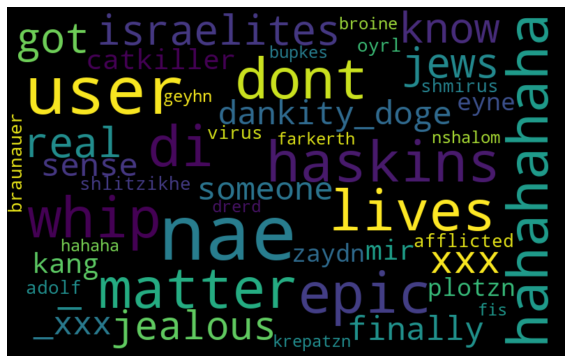

In [49]:
# Word Cloud for Class not-English
# create word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(df_english[df_english['label'] == 'not-English']['Text without Stopwords']))
# plot word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [51]:
# Sentiment Analysis using TextBlob
# create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
# create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
# create two new columns 'Subjectivity' & 'Polarity'
df_english['Subjectivity'] = df_english['preprocessed_text'].apply(getSubjectivity)
df_english['Polarity'] = df_english['preprocessed_text'].apply(getPolarity)

In [52]:
df_english.head()

,Unnamed: 0,text,label,preprocessed_text,readability,ARI,tokens_without_stopwords,tokens_with_stopwords,Word Count without Stopwords,Character Count,Average Word Length without Stopwords,Word Count with Stopwords,Average Word Length with Stopwords,Text without Stopwords,Subjectivity,Polarity
0,0,Thats it.... like....I dont like that statue,Non_hope_speech,thats it likei dont like that statue,115.13,7.6,"[thats, likei, dont, like, statue]","[thats, it, likei, dont, like, that, statue]",5,44,8.800000,7,6.285714,thats likei dont like statue,0.00,0.0
1,1,@Generation X Counting money that she been giv...,Non_hope_speech,<user> x counting money that she been given fo...,41.36,12.2,"[<user>, x, counting, money, given, promoting,...","[<user>, x, counting, money, that, she, been, ...",9,87,9.666667,13,6.692308,<user> x counting money given promoting hyster...,0.65,-0.6
2,2,@Paola Hernandez i never said to be intolerant...,Non_hope_speech,<user> hernandez i never said to be intolerant...,68.77,9.7,"[<user>, hernandez, never, said, intolerant, h...","[<user>, hernandez, i, never, said, to, be, in...",7,70,10.000000,11,6.363636,<user> hernandez never said intolerant hateful _,0.00,0.0
3,3,@Firstlast300 Wow An opinion is that I don't l...,Non_hope_speech,<user> wow an opinion is that i dont like a color,94.15,4.2,"[<user>, wow, opinion, dont, like, color]","[<user>, wow, an, opinion, is, that, i, dont, ...",6,57,9.500000,11,5.181818,<user> wow opinion dont like color,1.00,0.1
4,4,WOW!!!!!!!That was so so inspiring and incredi...,Hope_speech,wowthat was so so inspiring and incredible thi...,89.75,6.6,"[wowthat, inspiring, incredible, speech, saved...","[wowthat, was, so, so, inspiring, and, incredi...",6,86,14.333333,14,6.142857,wowthat inspiring incredible speech saved day,0.95,0.7


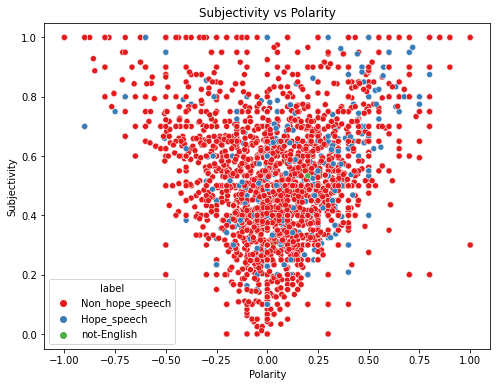

In [53]:
# plot subjectivity and polarity
from turtle import color
plt.figure(figsize=(8,6))
sns.scatterplot(x = df_english['Polarity'], y = df_english['Subjectivity'], hue=df_english['label'], palette='Set1')
plt.title('Subjectivity vs Polarity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [54]:
# Vader Sentiment Analysis
# create a function to get the sentiment scores (using compound score as a metric)
def getSentimentScores(text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 1
    elif sentiment['compound'] <= -0.05:
        return -1
    else:
        return 0
# create a new column 'Sentiment Scores'

getSentimentScores = np.vectorize(getSentimentScores)

df_english['Sentiment Scores'] = getSentimentScores(df_english['text'].values)

In [55]:
df_english.head()

,Unnamed: 0,text,label,preprocessed_text,readability,ARI,tokens_without_stopwords,tokens_with_stopwords,Word Count without Stopwords,Character Count,Average Word Length without Stopwords,Word Count with Stopwords,Average Word Length with Stopwords,Text without Stopwords,Subjectivity,Polarity,Sentiment Scores
0,0,Thats it.... like....I dont like that statue,Non_hope_speech,thats it likei dont like that statue,115.13,7.6,"[thats, likei, dont, like, statue]","[thats, it, likei, dont, like, that, statue]",5,44,8.800000,7,6.285714,thats likei dont like statue,0.00,0.0,-1
1,1,@Generation X Counting money that she been giv...,Non_hope_speech,<user> x counting money that she been given fo...,41.36,12.2,"[<user>, x, counting, money, given, promoting,...","[<user>, x, counting, money, that, she, been, ...",9,87,9.666667,13,6.692308,<user> x counting money given promoting hyster...,0.65,-0.6,1
2,2,@Paola Hernandez i never said to be intolerant...,Non_hope_speech,<user> hernandez i never said to be intolerant...,68.77,9.7,"[<user>, hernandez, never, said, intolerant, h...","[<user>, hernandez, i, never, said, to, be, in...",7,70,10.000000,11,6.363636,<user> hernandez never said intolerant hateful _,0.00,0.0,0
3,3,@Firstlast300 Wow An opinion is that I don't l...,Non_hope_speech,<user> wow an opinion is that i dont like a color,94.15,4.2,"[<user>, wow, opinion, dont, like, color]","[<user>, wow, an, opinion, is, that, i, dont, ...",6,57,9.500000,11,5.181818,<user> wow opinion dont like color,1.00,0.1,1
4,4,WOW!!!!!!!That was so so inspiring and incredi...,Hope_speech,wowthat was so so inspiring and incredible thi...,89.75,6.6,"[wowthat, inspiring, incredible, speech, saved...","[wowthat, was, so, so, inspiring, and, incredi...",6,86,14.333333,14,6.142857,wowthat inspiring incredible speech saved day,0.95,0.7,1


In [56]:
df_english['label'].unique()

array(['Non_hope_speech', 'Hope_speech', 'not-English'], dtype=object)

<AxesSubplot:title={'center':'Count Class Non_hope_speech (Sentiment Scores)'}>

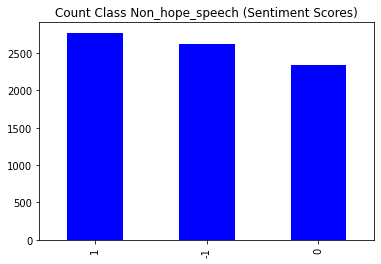

In [57]:
df_english[df_english['label']=='Non_hope_speech']['Sentiment Scores'].value_counts().plot(kind='bar', title='Count Class Non_hope_speech (Sentiment Scores)', color='blue')

<AxesSubplot:title={'center':'Count Class Hope_speech (Sentiment Scores)'}>

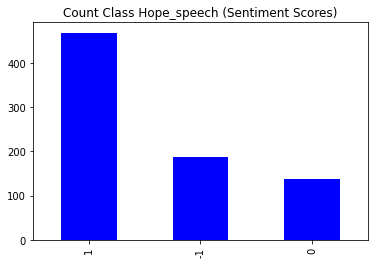

In [58]:
df_english[df_english['label']=='Hope_speech']['Sentiment Scores'].value_counts().plot(kind='bar', title='Count Class Hope_speech (Sentiment Scores)', color='blue')

<AxesSubplot:title={'center':'Count Class not-English (Sentiment Scores)'}>

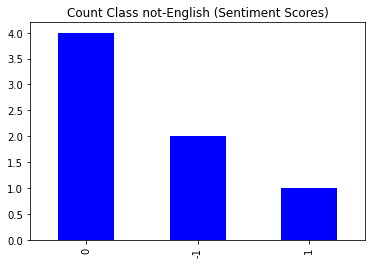

In [59]:
df_english[df_english['label']=='not-English']['Sentiment Scores'].value_counts().plot(kind='bar', title='Count Class not-English (Sentiment Scores)', color='blue')